# Предсказание оттока клиентов банка с помощью логистической регрессии

## Выполнил: Аннануров Даниил Петрович ИВТ 1.2

## Описание задачи

Некоторый банк обратился за помощью в разработке кампании лояльности по удержанию клиентов. Цель - прогнозировать вероятности оттока клиентов и определять, уйдёт ли клиент в ближайшее время.

**Цель:** Построить классификатор на основе логистической регрессии для своевременного определения уходящих клиентов банка.

**Данные:** Набор данных содержит информацию о клиентах банка с различными характеристиками и целевой переменной `Exited` (1 - ушедший клиент, 0 - лояльный клиент).

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Библиотеки для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

# Настройка отображения
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Библиотеки успешно импортированы!")

Библиотеки успешно импортированы!


## 1. Загрузка и исследование данных

In [ ]:
# Загрузка данных
df = pd.read_csv('churn.csv')

# Основная информация о данных
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
df.head()

Размер датасета: (10000, 14)

Первые 5 строк:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Информация о структуре данных
print("Информация о датасете:")
print(df.info())

print("\nСтатистические характеристики:")
df.describe()

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Статистические характеристики:


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Пропущенные значения:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Распределение целевой переменной (Exited):
Exited
0    7963
1    2037
Name: count, dtype: int64

Процентное соотношение:
Exited
0    79.63
1    20.37
Name: proportion, dtype: float64


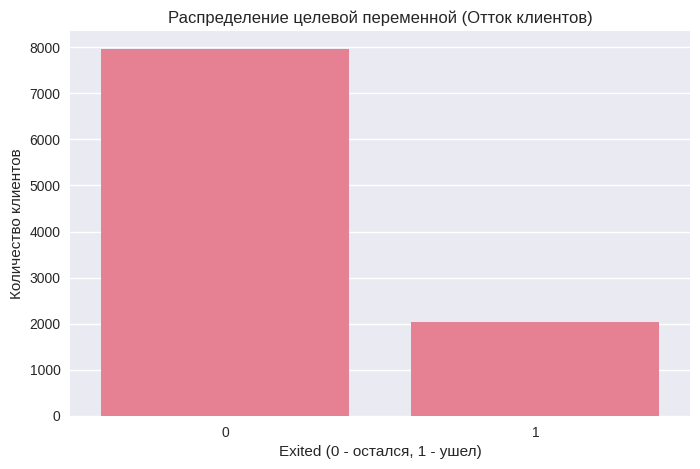

In [ ]:
# Проверка пропущенных значений
print("Пропущенные значения:")
print(df.isnull().sum())

# Распределение целевой переменной
print("\nРаспределение целевой переменной (Exited):")
print(df['Exited'].value_counts())
print("\nПроцентное соотношение:")
print(df['Exited'].value_counts(normalize=True) * 100)

# Визуализация распределения целевой переменной
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Exited')
plt.title('Распределение целевой переменной (Отток клиентов)')
plt.xlabel('Exited (0 - остался, 1 - ушел)')
plt.ylabel('Количество клиентов')
plt.show()

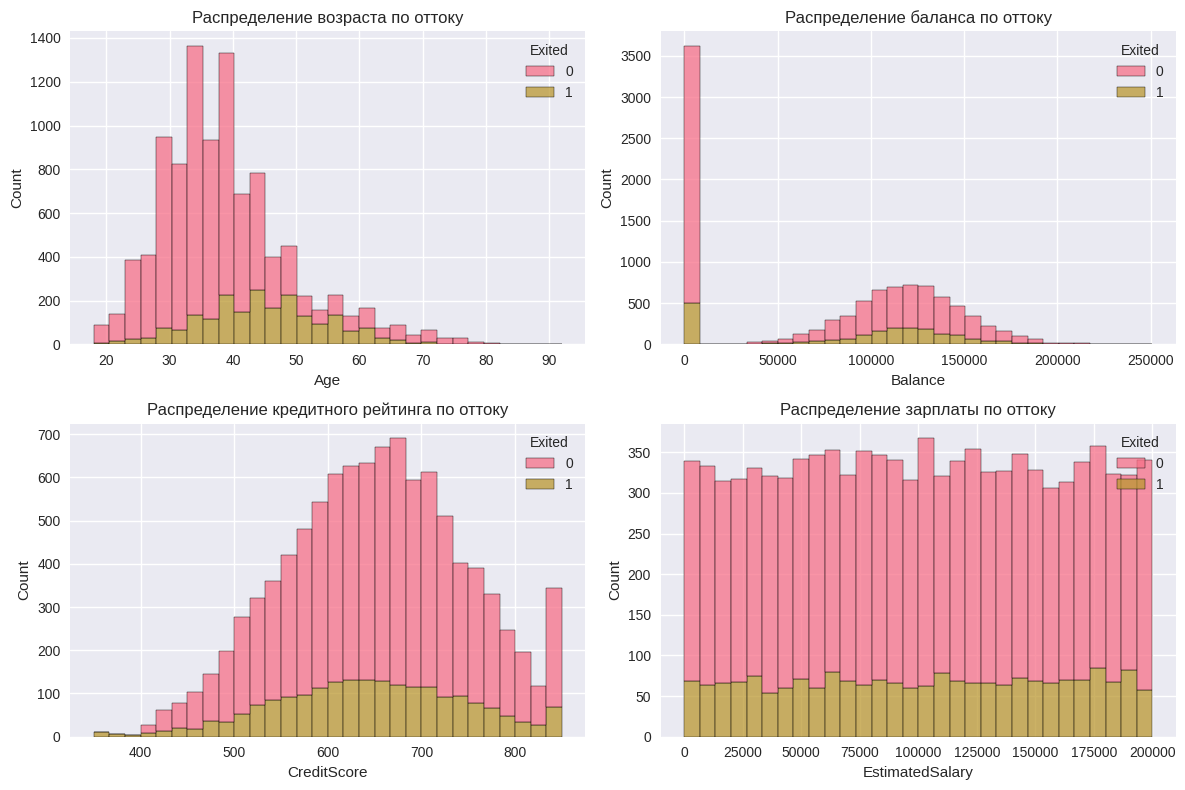

In [ ]:
# Исследовательский анализ данных

# Распределение по возрасту
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30)
plt.title('Распределение возраста по оттоку')

# Распределение по балансу
plt.subplot(2, 2, 2)
sns.histplot(data=df, x='Balance', hue='Exited', multiple='stack', bins=30)
plt.title('Распределение баланса по оттоку')

# Распределение по кредитному рейтингу
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='CreditScore', hue='Exited', multiple='stack', bins=30)
plt.title('Распределение кредитного рейтинга по оттоку')

# Распределение по зарплате
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', multiple='stack', bins=30)
plt.title('Распределение зарплаты по оттоку')

plt.tight_layout()
plt.show()

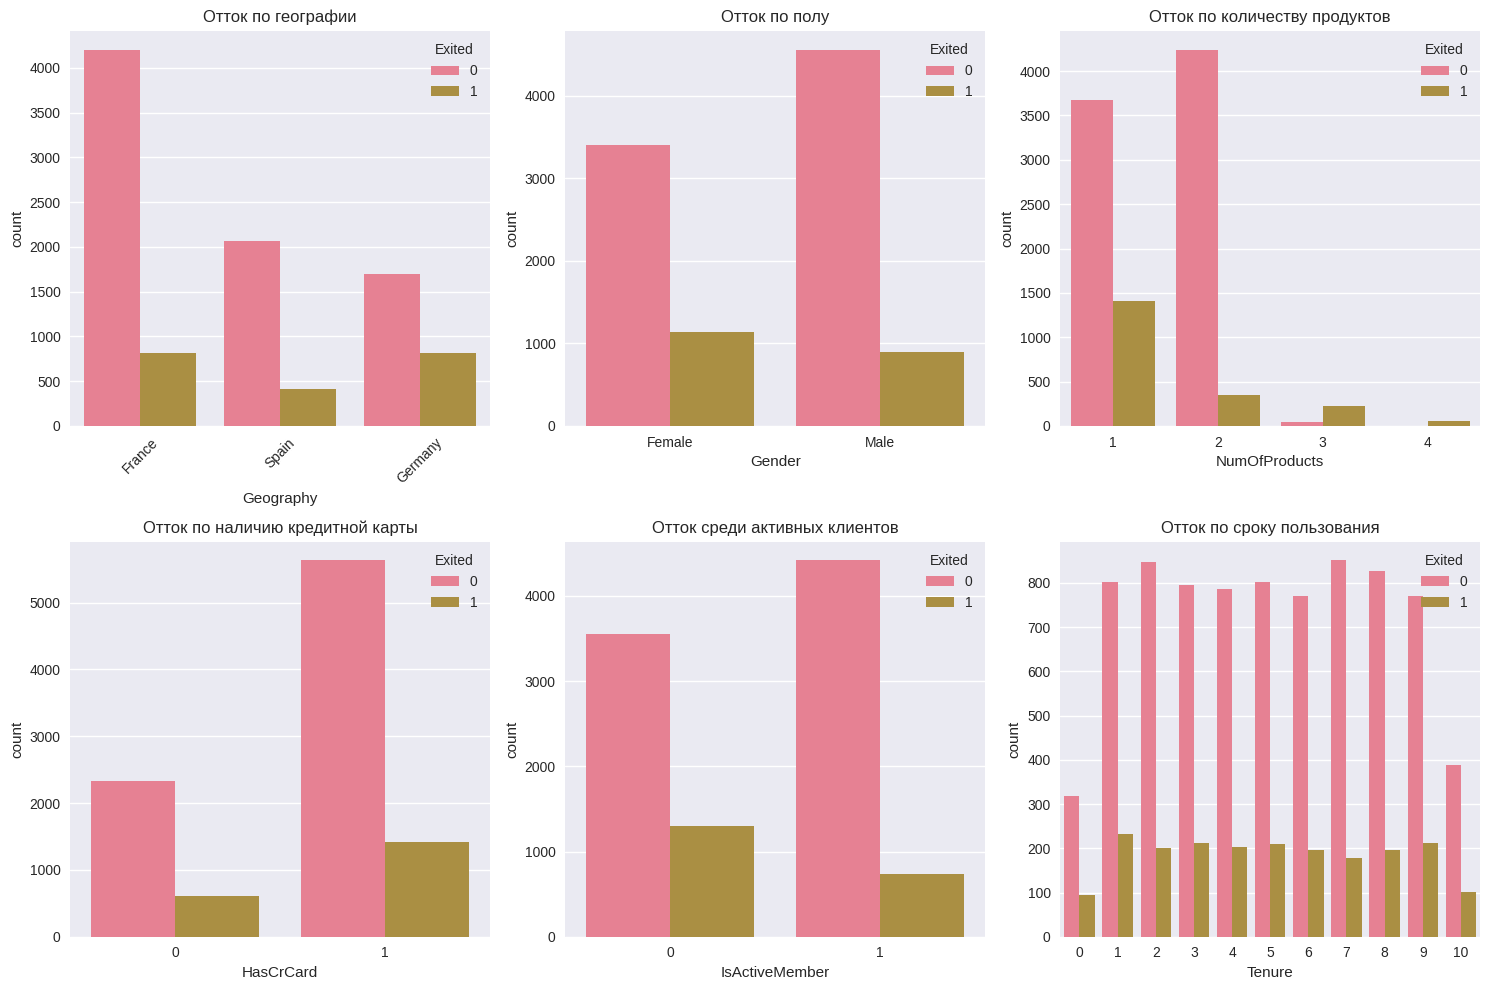

In [ ]:
# Анализ категориальных переменных

plt.figure(figsize=(15, 10))

# География
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title('Отток по географии')
plt.xticks(rotation=45)

# Пол
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Gender', hue='Exited')
plt.title('Отток по полу')

# Количество продуктов
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='NumOfProducts', hue='Exited')
plt.title('Отток по количеству продуктов')

# Наличие кредитной карты
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Отток по наличию кредитной карты')

# Активный клиент
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='IsActiveMember', hue='Exited')
plt.title('Отток среди активных клиентов')

# Срок пользования банком
plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Tenure', hue='Exited')
plt.title('Отток по сроку пользования')

plt.tight_layout()
plt.show()

## 2. Предобработка данных

In [ ]:
# Создание копии данных для обработки
df_processed = df.copy()

# Удаляем ненужные столбцы (RowNumber, CustomerId, Surname)
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df_processed = df_processed.drop(columns=columns_to_drop)

print("Удалены столбцы:", columns_to_drop)
print("Размер данных после удаления:", df_processed.shape)

# Кодирование категориальных переменных
# География - One-Hot Encoding
geography_dummies = pd.get_dummies(df_processed['Geography'], prefix='Geography')
df_processed = pd.concat([df_processed, geography_dummies], axis=1)
df_processed = df_processed.drop('Geography', axis=1)

# Пол - Label Encoding
le_gender = LabelEncoder()
df_processed['Gender'] = le_gender.fit_transform(df_processed['Gender'])

print("\nПреобразование завершено!")
print("Новые столбцы после кодирования географии:", list(geography_dummies.columns))
print("Пол закодирован как:", dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_))))

print("\nФинальная структура данных:")
print(df_processed.head())

Удалены столбцы: ['RowNumber', 'CustomerId', 'Surname']
Размер данных после удаления: (10000, 11)

Преобразование завершено!
Новые столбцы после кодирования географии: ['Geography_France', 'Geography_Germany', 'Geography_Spain']
Пол закодирован как: {'Female': np.int64(0), 'Male': np.int64(1)}

Финальная структура данных:
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_France  Geography_Germany  Geography_Spain
0          619       0   42       2       0.00              1          1               1        101348.88       1              True              False            False
1          608       0   41       1   83807.86              1          0               1        112542.58       0             False              False             True
2          502       0   42       8  159660.80              3          1               0        113931.57       1              True              False            False
3   

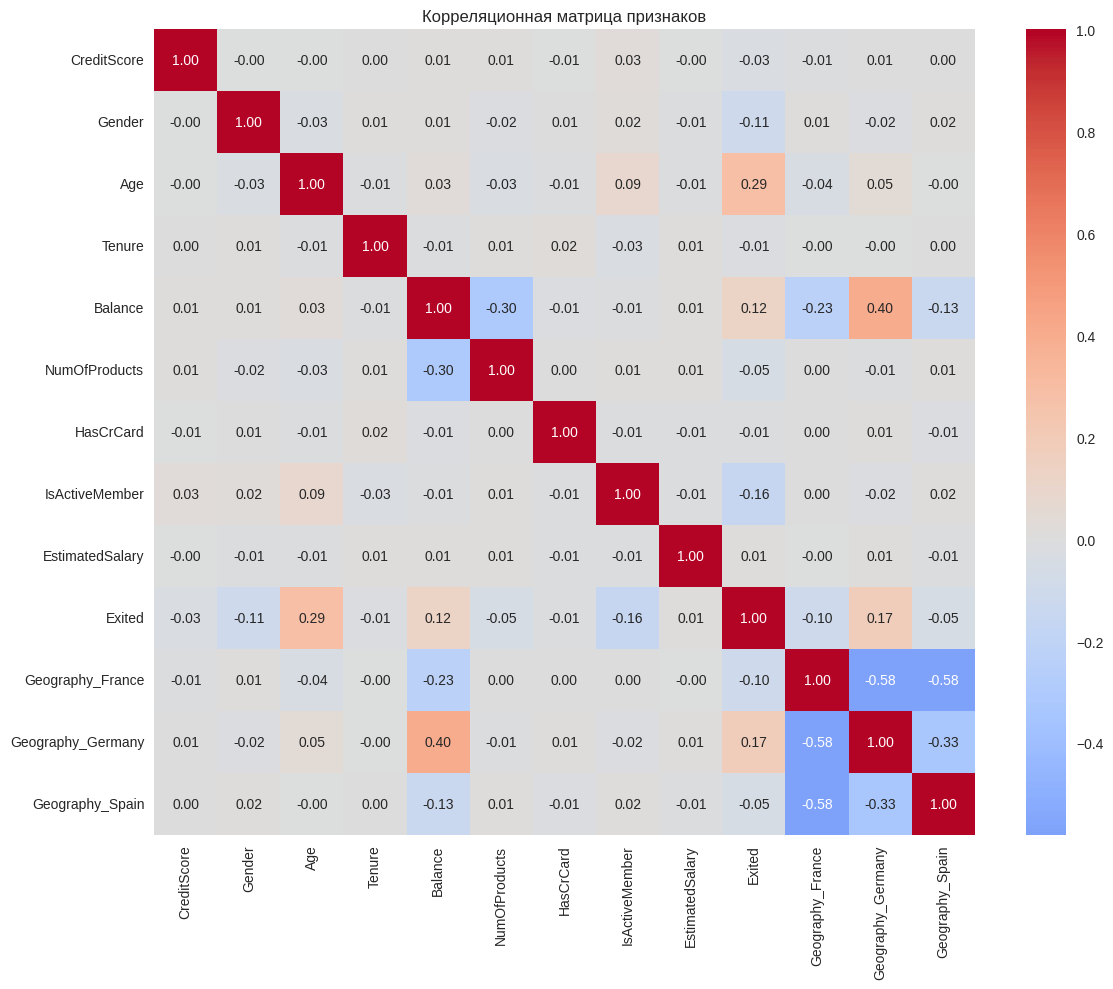

Корреляция признаков с целевой переменной (Exited):
Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
IsActiveMember      -0.156128
Balance              0.118533
Gender              -0.106512
Geography_France    -0.104955
Geography_Spain     -0.052667
NumOfProducts       -0.047820
CreditScore         -0.027094
Tenure              -0.014001
EstimatedSalary      0.012097
HasCrCard           -0.007138
Name: Exited, dtype: float64


In [ ]:
# Корреляционная матрица
plt.figure(figsize=(12, 10))
corr_matrix = df_processed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()

# Корреляция с целевой переменной
print("Корреляция признаков с целевой переменной (Exited):")
corr_with_target = df_processed.corr()['Exited'].sort_values(key=abs, ascending=False)
print(corr_with_target)

## 3. Инженерия признаков

In [ ]:
# Выбор признаков для модели
# Исключаем целевую переменную
features = df_processed.drop('Exited', axis=1)
target = df_processed['Exited']

print("Признаки для модели:")
print(features.columns.tolist())
print("\nРазмер признаков:", features.shape)
print("Размер целевой переменной:", target.shape)

# Создание дополнительных признаков
# Возрастные группы
features['AgeGroup'] = pd.cut(features['Age'], bins=[0, 30, 45, 60, 100], labels=[0, 1, 2, 3])
features['AgeGroup'] = features['AgeGroup'].astype(int)

# Группы по балансу
features['BalanceGroup'] = pd.cut(features['Balance'], bins=[-1, 0, 50000, 100000, float('inf')], labels=[0, 1, 2, 3])
features['BalanceGroup'] = features['BalanceGroup'].astype(int)

# Показатель активности (активный клиент с кредитной картой)
features['ActiveWithCard'] = features['IsActiveMember'] * features['HasCrCard']

print("\nДобавлены новые признаки:")
print("- AgeGroup: группы по возрасту")
print("- BalanceGroup: группы по балансу")
print("- ActiveWithCard: активный клиент с картой")

print("\nИтоговое количество признаков:", features.shape[1])

Признаки для модели:
['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain']

Размер признаков: (10000, 12)
Размер целевой переменной: (10000,)

Добавлены новые признаки:
- AgeGroup: группы по возрасту
- BalanceGroup: группы по балансу
- ActiveWithCard: активный клиент с картой

Итоговое количество признаков: 15


## 4. Разделение данных на обучающую и тестовую выборки

In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

print("Размеры выборок:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Целевая переменная (обучение): {y_train.shape}")
print(f"Целевая переменная (тест): {y_test.shape}")

# Проверка распределения классов в выборках
print("\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Размеры выборок:
Обучающая выборка: (8000, 15)
Тестовая выборка: (2000, 15)
Целевая переменная (обучение): (8000,)
Целевая переменная (тест): (2000,)

Распределение классов в обучающей выборке:
Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64


In [ ]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Масштабирование признаков завершено!")
print(f"Средние значения до масштабирования: {X_train.mean().mean():.3f}")
print(f"Средние значения после масштабирования: {X_train_scaled.mean():.3f}")
print(f"Стандартные отклонения после масштабирования: {X_train_scaled.std():.3f}")

Масштабирование признаков завершено!
Средние значения до масштабирования: 11787.614
Средние значения после масштабирования: -0.000
Стандартные отклонения после масштабирования: 1.000


## 5. Обучение модели логистической регрессии

In [ ]:
# Создание и обучение модели логистической регрессии
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

print("Модель логистической регрессии обучена!")
print(f"Количество итераций: {logistic_model.n_iter_[0]}")
print(f"Коэффициенты модели: {len(logistic_model.coef_[0])}")

# Предсказания на обучающей и тестовой выборках
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

# Предсказание вероятностей
y_train_proba = logistic_model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = logistic_model.predict_proba(X_test_scaled)[:, 1]

print("\nПредсказания получены!")
print(f"Примеры вероятностей оттока: {y_test_proba[:5]}")

Модель логистической регрессии обучена!
Количество итераций: 19
Коэффициенты модели: 15

Предсказания получены!
Примеры вероятностей оттока: [0.1247394  0.27650211 0.12200547 0.14283595 0.09715648]


## 6. Оценка качества модели

In [ ]:
# Расчет метрик качества

# Метрики для обучающей выборки
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_proba)

# Метрики для тестовой выборки
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

# Вывод результатов
print("МЕТРИКИ КАЧЕСТВА МОДЕЛИ")
print("=" * 50)
print(f"{'Метрика':<15} {'Обучение':<12} {'Тест':<12}")
print("-" * 50)
print(f"{'Accuracy':<15} {train_accuracy:<12.4f} {test_accuracy:<12.4f}")
print(f"{'Precision':<15} {train_precision:<12.4f} {test_precision:<12.4f}")
print(f"{'Recall':<15} {train_recall:<12.4f} {test_recall:<12.4f}")
print(f"{'F1-Score':<15} {train_f1:<12.4f} {test_f1:<12.4f}")
print(f"{'ROC-AUC':<15} {train_auc:<12.4f} {test_auc:<12.4f}")
print("=" * 50)

# Детальный отчет по классификации
print("\nДетальный отчет по классификации (тестовая выборка):")
print(classification_report(y_test, y_test_pred, target_names=['Остался', 'Ушел']))

МЕТРИКИ КАЧЕСТВА МОДЕЛИ
Метрика         Обучение     Тест        
--------------------------------------------------
Accuracy        0.8163       0.8090      
Precision       0.6394       0.5940      
Recall          0.2252       0.1941      
F1-Score        0.3330       0.2926      
ROC-AUC         0.7659       0.7723      

Детальный отчет по классификации (тестовая выборка):
              precision    recall  f1-score   support

     Остался       0.82      0.97      0.89      1593
        Ушел       0.59      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## 7. Визуализация результатов

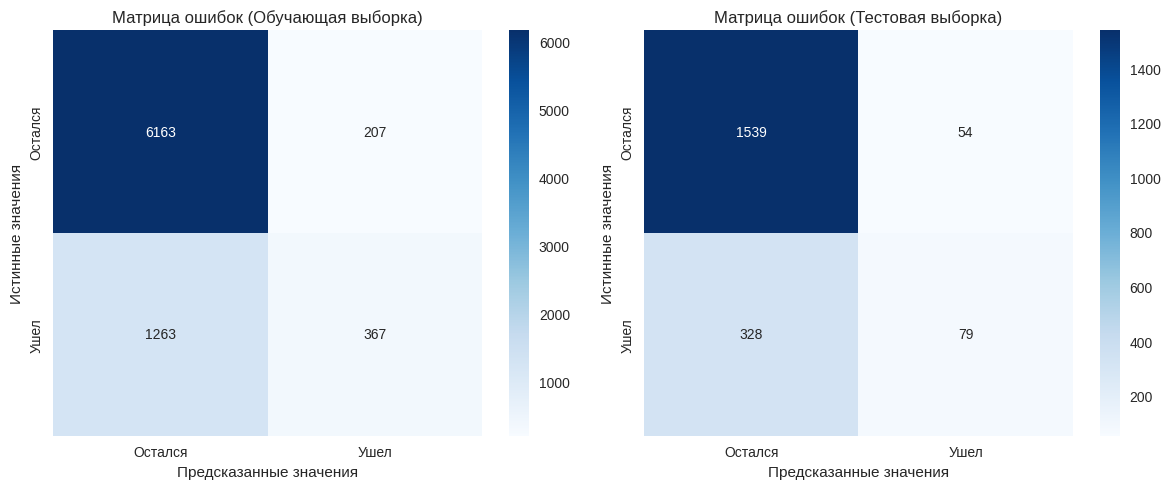


Анализ матрицы ошибок (тестовая выборка):
True Negatives (правильно предсказанные 'остались'): 1539
False Positives (ошибочно предсказанные 'ушли'): 54
False Negatives (пропущенные 'ушли'): 328
True Positives (правильно предсказанные 'ушли'): 79


In [ ]:
# Матрица ошибок
plt.figure(figsize=(12, 5))

# Обучающая выборка
plt.subplot(1, 2, 1)
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Остался', 'Ушел'],
            yticklabels=['Остался', 'Ушел'])
plt.title('Матрица ошибок (Обучающая выборка)')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

# Тестовая выборка
plt.subplot(1, 2, 2)
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Остался', 'Ушел'],
            yticklabels=['Остался', 'Ушел'])
plt.title('Матрица ошибок (Тестовая выборка)')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')

plt.tight_layout()
plt.show()

# Анализ матрицы ошибок
tn, fp, fn, tp = cm_test.ravel()
print(f"\nАнализ матрицы ошибок (тестовая выборка):")
print(f"True Negatives (правильно предсказанные 'остались'): {tn}")
print(f"False Positives (ошибочно предсказанные 'ушли'): {fp}")
print(f"False Negatives (пропущенные 'ушли'): {fn}")
print(f"True Positives (правильно предсказанные 'ушли'): {tp}")

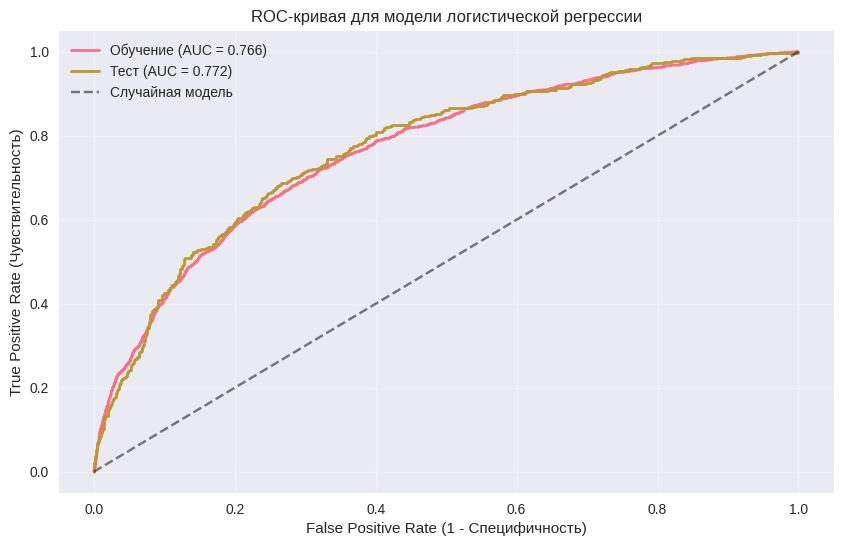


Интерпретация AUC-Score:
Удовлетворительная модель (0.7 ≤ AUC < 0.8)


In [ ]:
# ROC-кривая
plt.figure(figsize=(10, 6))

# Расчет ROC-кривой для обучающей выборки
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)

# Расчет ROC-кривой для тестовой выборки
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Построение ROC-кривых
plt.plot(fpr_train, tpr_train, label=f'Обучение (AUC = {train_auc:.3f})', linewidth=2)
plt.plot(fpr_test, tpr_test, label=f'Тест (AUC = {test_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Случайная модель', alpha=0.5)

plt.xlabel('False Positive Rate (1 - Специфичность)')
plt.ylabel('True Positive Rate (Чувствительность)')
plt.title('ROC-кривая для модели логистической регрессии')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Интерпретация AUC
print(f"\nИнтерпретация AUC-Score:")
if test_auc >= 0.9:
    print("Отличная модель (AUC ≥ 0.9)")
elif test_auc >= 0.8:
    print("Хорошая модель (0.8 ≤ AUC < 0.9)")
elif test_auc >= 0.7:
    print("Удовлетворительная модель (0.7 ≤ AUC < 0.8)")
elif test_auc >= 0.6:
    print("Плохая модель (0.6 ≤ AUC < 0.7)")
else:
    print("Неудачная модель (AUC < 0.6)")

Важность признаков (коэффициенты логистической регрессии):
              feature  coefficient  abs_coefficient
2                 Age     0.541954         0.541954
7      IsActiveMember    -0.384988         0.384988
1              Gender    -0.261824         0.261824
10  Geography_Germany     0.237094         0.237094
12           AgeGroup     0.220209         0.220209
14     ActiveWithCard    -0.182897         0.182897
13       BalanceGroup     0.181809         0.181809
9    Geography_France    -0.126899         0.126899
11    Geography_Spain    -0.090731         0.090731
0         CreditScore    -0.085001         0.085001
5       NumOfProducts    -0.062384         0.062384
8     EstimatedSalary     0.045923         0.045923
6           HasCrCard     0.038703         0.038703
3              Tenure    -0.019559         0.019559
4             Balance    -0.007380         0.007380


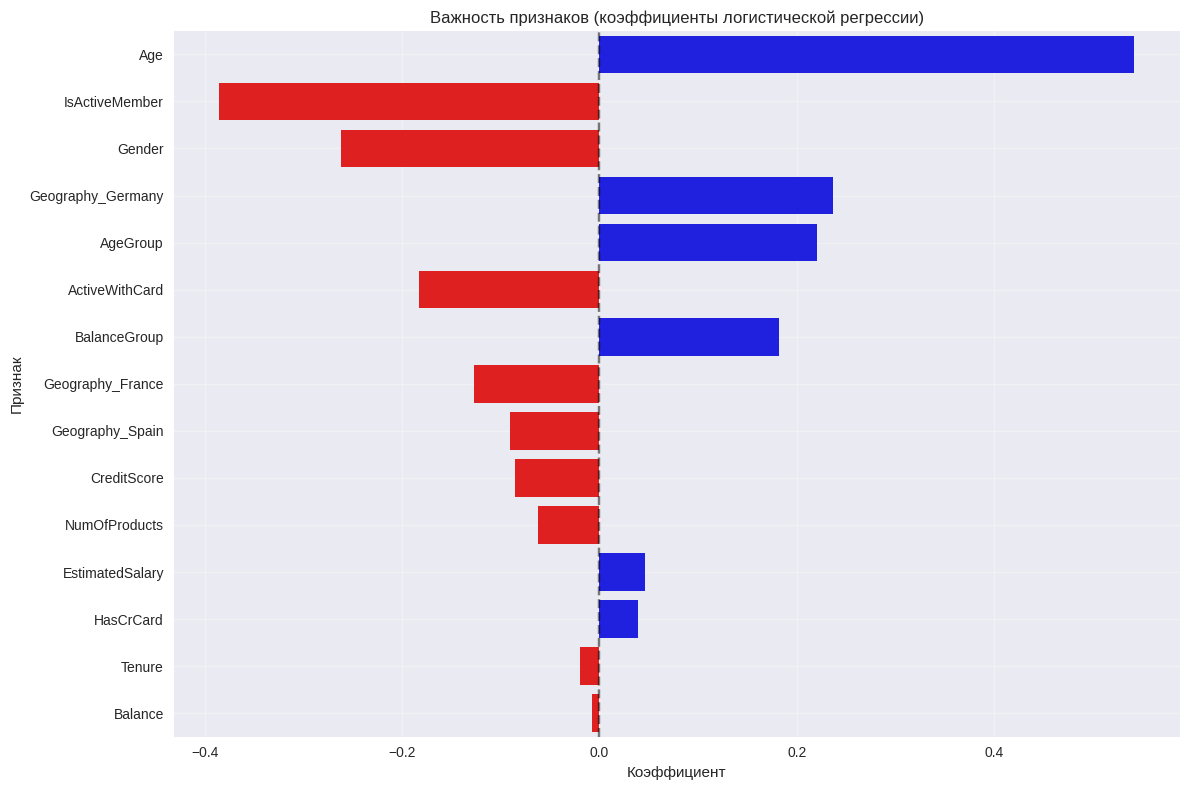


Интерпретация коэффициентов:
- Положительные коэффициенты увеличивают вероятность оттока
- Отрицательные коэффициенты уменьшают вероятность оттока
- Чем больше абсолютное значение, тем сильнее влияние признака


In [ ]:
# Анализ важности признаков
feature_importance = pd.DataFrame({
    'feature': features.columns,
    'coefficient': logistic_model.coef_[0],
    'abs_coefficient': np.abs(logistic_model.coef_[0])
})

# Сортировка по абсолютному значению коэффициентов
feature_importance = feature_importance.sort_values('abs_coefficient', ascending=False)

print("Важность признаков (коэффициенты логистической регрессии):")
print(feature_importance)

# Визуализация важности признаков
plt.figure(figsize=(12, 8))

# Топ-15 наиболее важных признаков
top_features = feature_importance.head(15)

sns.barplot(data=top_features, y='feature', x='coefficient',
            palette=['red' if x < 0 else 'blue' for x in top_features['coefficient']])
plt.title('Важность признаков (коэффициенты логистической регрессии)')
plt.xlabel('Коэффициент')
plt.ylabel('Признак')
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Интерпретация коэффициентов
print("\nИнтерпретация коэффициентов:")
print("- Положительные коэффициенты увеличивают вероятность оттока")
print("- Отрицательные коэффициенты уменьшают вероятность оттока")
print("- Чем больше абсолютное значение, тем сильнее влияние признака")

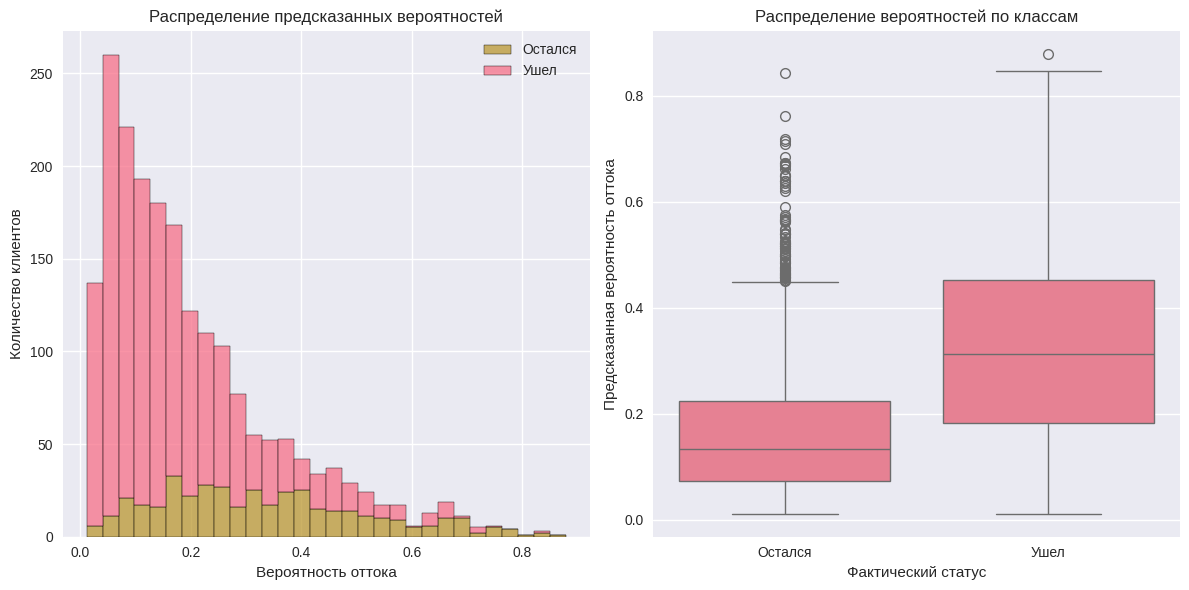

Статистика предсказанных вероятностей:
Средняя вероятность для оставшихся клиентов: 0.170
Средняя вероятность для ушедших клиентов: 0.333
Медиана вероятности для оставшихся клиентов: 0.134
Медиана вероятности для ушедших клиентов: 0.313


In [ ]:
# Распределение предсказанных вероятностей
plt.figure(figsize=(12, 6))

# Гистограмма вероятностей для разных классов
plt.subplot(1, 2, 1)
df_proba = pd.DataFrame({
    'probability': y_test_proba,
    'actual': y_test
})

sns.histplot(data=df_proba, x='probability', hue='actual', multiple='stack', bins=30)
plt.title('Распределение предсказанных вероятностей')
plt.xlabel('Вероятность оттока')
plt.ylabel('Количество клиентов')
plt.legend(labels=['Остался', 'Ушел'])

# Box plot вероятностей
plt.subplot(1, 2, 2)
sns.boxplot(data=df_proba, x='actual', y='probability')
plt.title('Распределение вероятностей по классам')
plt.xlabel('Фактический статус')
plt.ylabel('Предсказанная вероятность оттока')
plt.xticks([0, 1], ['Остался', 'Ушел'])

plt.tight_layout()
plt.show()

# Статистика по вероятностям
print("Статистика предсказанных вероятностей:")
print(f"Средняя вероятность для оставшихся клиентов: {y_test_proba[y_test == 0].mean():.3f}")
print(f"Средняя вероятность для ушедших клиентов: {y_test_proba[y_test == 1].mean():.3f}")
print(f"Медиана вероятности для оставшихся клиентов: {np.median(y_test_proba[y_test == 0]):.3f}")
print(f"Медиана вероятности для ушедших клиентов: {np.median(y_test_proba[y_test == 1]):.3f}")